## FAKE NEWS DETECTION

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
df_fake["class"]= 0
df_true["class"]= 1

In [6]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470, -1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)  
for i in range(21416,21406, -1):
    df_true.drop([i], axis=0, inplace=True)

In [7]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [8]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [9]:
df = df_marge.drop(["title", "subject", "date"], axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [10]:
#Shuffle The Dataset (True and Fake)
df = df.sample(frac=1)

In [11]:
df.head(10)

,text,class
5774,Stephen Colbert was so angry at Senate Republi...,0
8714,(Reuters) - Protesters for and against Trump f...,1
5332,NEW YORK (Reuters) - NATO is the “strongest al...,1
5299,"Marco Rubio, who is now working doggedly to ke...",0
1705,NEW YORK (Reuters) - New York police and a hos...,1
15737,VIENNA (Reuters) - Austria s conservative Peop...,1
646,WASHINGTON (Reuters) - U.S. Attorney General J...,1
7022,WASHINGTON/HAVANA (Reuters) - U.S. President-e...,1
19473,Newsweek reporter Kurt Eichenwald came under f...,0
13445,"Democrat dummy of the day Rep. Tom Cole (R., O...",0


In [12]:
#Check if any null value is there in dataframe.
df.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','', text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'', text)
    text = re.sub('\n','', text)
    text = re.sub('\w*\d\w*','', text)
    return text

In [14]:
df["text"] = df["text"].apply(word_drop)

In [15]:
df.head(10)

,text,class
5774,stephen colbert was so angry at senate republi...,0
8714,reuters protesters for and against trump f...,1
5332,new york reuters nato is the strongest al...,1
5299,marco rubio who is now working doggedly to ke...,0
1705,new york reuters new york police and a hos...,1
15737,vienna reuters austria s conservative peop...,1
646,washington reuters u s attorney general j...,1
7022,washington havana reuters u s president e...,1
19473,newsweek reporter kurt eichenwald came under f...,0
13445,democrat dummy of the day rep tom cole r o...,0


In [16]:
#Now we will define dependent and independent variable as x and y
x = df["text"]
y = df["class"]

class
0    23471
1    21407
Name: text, dtype: int64


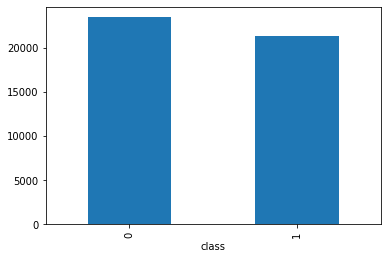

In [17]:
# How many fake and real articles?
print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

In [18]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
#Spliting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [20]:
#vectorize the x variable because for calculation we cant use raw text.
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

###LOGISTIC REGRESSION


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
LR.score(xv_test, y_test)

0.9846702317290552

In [25]:
pred_LR = LR.predict(xv_test)

In [26]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5914
           1       0.98      0.99      0.98      5306

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



Confusion matrix, without normalization


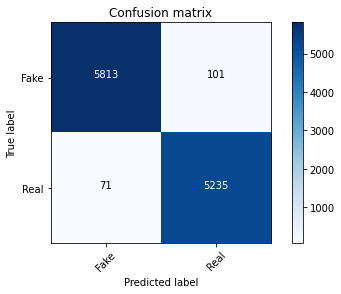

In [27]:
cm = metrics.confusion_matrix(y_test, pred_LR)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### DECISION TREE CLASSIFIER

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
DT.score(xv_test, y_test)

0.9950089126559715

In [31]:
pred_DT = DT.predict(xv_test)

In [32]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5914
           1       1.00      0.99      0.99      5306

    accuracy                           1.00     11220
   macro avg       1.00      0.99      0.99     11220
weighted avg       1.00      1.00      1.00     11220



Confusion matrix, without normalization


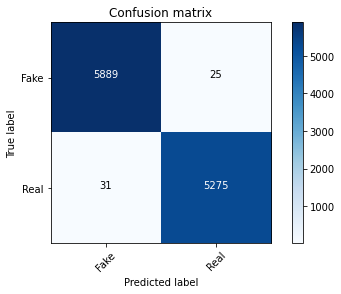

In [33]:
cm = metrics.confusion_matrix(y_test, pred_DT)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### RANDOM FOREST CLASSIFIER

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RFC = RandomForestClassifier()
RFC.fit(xv_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
RFC.score(xv_test, y_test)

0.9896613190730837

In [37]:
pred_RFC= RFC.predict(xv_test)

In [38]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5914
           1       0.99      0.99      0.99      5306

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion matrix, without normalization


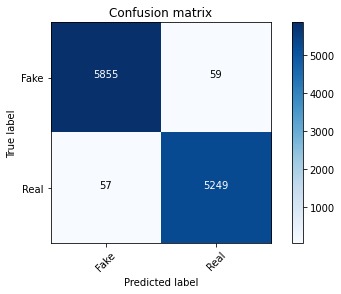

In [39]:
cm = metrics.confusion_matrix(y_test, pred_RFC)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### MANUAL TESTING

In [42]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [43]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of